In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('train_data.csv',index_col='trade_date',
                  parse_dates=True) 
data.sort_index(axis=0,inplace=True)
data  #先用历史数据倒置数据集

,Unnamed: 0,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2001-08-27,4864,600519.SH,4.6173,5.0549,4.3952,4.7565,4.1999,0.5566,13.2527,406318.00,1.410347e+06
2001-08-28,4863,600519.SH,4.6816,4.9505,4.6307,4.9318,4.7565,0.1753,3.6855,129647.79,4.634631e+05
2001-08-29,4862,600519.SH,4.9478,4.9505,4.8301,4.8675,4.9318,-0.0643,-1.3038,53252.75,1.946896e+05
2001-08-30,4861,600519.SH,4.8542,5.0187,4.8167,4.9639,4.8675,0.0964,1.9805,48013.06,1.775586e+05
2001-08-31,4860,600519.SH,4.9706,5.0334,4.9237,4.9518,4.9639,-0.0121,-0.2438,23231.48,8.623124e+04
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,4,600519.SH,2168.0000,2168.0000,2112.0000,2131.8200,2194.0900,-62.2700,-2.8381,37555.90,8.020678e+06
2021-12-28,3,600519.SH,2133.0000,2155.5000,2116.6000,2138.1800,2131.8200,6.3600,0.2983,27650.70,5.901941e+06
2021-12-29,2,600519.SH,2150.0000,2154.2500,2041.0000,2041.0000,2138.1800,-97.1800,-4.5450,54049.02,1.119563e+07


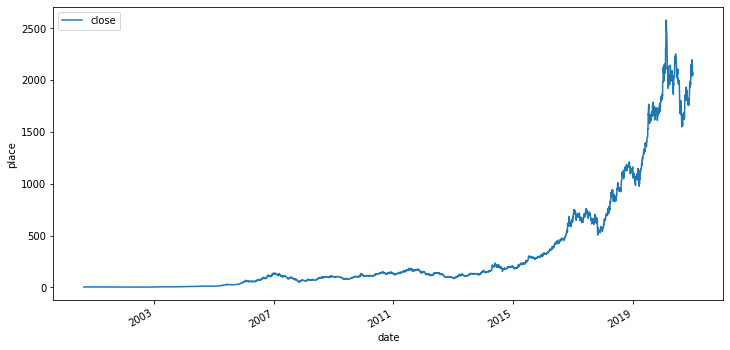

In [10]:
plt.rcParams['figure.figsize']=[12,6]
data['close'].plot()
plt.legend(loc=2)
plt.xlabel('date')
plt.ylabel('place')
plt.show()

In [26]:
forecast_col='close' 
forecast_out=300 #预测后300天收盘价
data['label']=data[forecast_col].shift(-forecast_out)
'''
采用 shift 加上负值的方法 可以把同一组数据错位的放在一起，
这个错位是把300天后的数据与当前天的数据放在同一行中，
然后两个字段数值相减就可以获得对应天数股票价格的差值
'''
data[4560:4680] #后300行（4865行之后）缺失说明操作正确，

,open,high,low,close,vol,label
trade_date,,,,,,
2020-09-29,1653.6954,1653.7647,1636.8249,1636.8249,17430.78,2131.82
2020-09-30,1644.4528,1676.0540,1644.4528,1652.8732,27087.81,2138.18
2020-10-09,1676.1531,1690.4380,1672.1905,1680.1156,34239.88,2041.00
2020-10-12,1684.0781,1734.2141,1684.0781,1734.2141,43729.04,2075.00
2020-10-13,1734.2240,1734.2240,1718.7503,1722.7129,22943.89,2050.00
...,...,...,...,...,...,...
2021-03-25,1951.5593,1970.2525,1928.5667,1952.5400,31575.23,NaN
2021-03-26,1966.4089,2003.0623,1939.6618,1994.1466,50016.42,NaN
2021-03-29,2024.0638,2076.7160,2007.1735,2015.0490,56992.20,NaN


In [28]:
#构建数据集
data = data[['open', 'high', 'low', 'close','vol','label']]
data.head()

,open,high,low,close,vol,label
trade_date,,,,,,
2001-08-27,4.6173,5.0549,4.3952,4.7565,406318.00,3.9565
2001-08-28,4.6816,4.9505,4.6307,4.9318,129647.79,4.0538
2001-08-29,4.9478,4.9505,4.8301,4.8675,53252.75,4.0403
2001-08-30,4.8542,5.0187,4.8167,4.9639,48013.06,4.0044
2001-08-31,4.9706,5.0334,4.9237,4.9518,23231.48,3.9580


In [29]:
#缺失值处理
data.dropna(inplace=True)
#核实缺失值处理完毕
data.isnull().sum()

open     0
high     0
low      0
close    0
vol      0
label    0
dtype: int64

In [31]:
#划分特征数据和标签数据
X = np.array(data.drop(['label'], 1))
y = np.array(data['label'])

#剔除最后的300条数据
X_lately = X[-forecast_out:]  # 把最后300行单独拿出来
X = X[:-forecast_out]    #  x中存放除最后300行以外的其他信息
y = y[:-forecast_out]

In [32]:
#训练数据与测试数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#创建模型
clf=LinearRegression()

#训练模型
clf.fit(X_train,y_train)

#模型预测
y_pred = clf.predict(X_test)
min(y_pred),max(y_pred)

#模型得分
confidence = clf.score(X_test, y_test)
confidence

0.930615562729307

归准确性达0.93，看看其他指标

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error
print('MAE(均方误差):',mean_absolute_error(y_test,y_pred))
print('r2(决定系数):',r2_score(y_test,y_pred))
t=mean_absolute_error(y_test,y_pred)/np.mean(y_pred)
t*=10
print('%.2f'%t) 
'''预测结果的平均值结合平均绝对误差，
可以推测该模型预测单次预测股票数据的涨跌幅范围，
即正负2.34%'''

MAE(均方误差): 60.10821206214621
r2(决定系数): 0.930615562729307
2.34
